
Presented By:

Mehdi Zadeh

Resume Pages: https://www.linkedin.com/in/mehdihabibzadeh/

Email: Zadeh1980mehdi@gmail.com

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
wget https://storage.googleapis.com/nicksdemobucket/banknotes.csv

SyntaxError: invalid syntax (Temp/ipykernel_1268/3163628026.py, line 1)

In [3]:
df = pd.read_csv('./banknotes.csv')

FileNotFoundError: [Errno 2] No such file or directory: './banknotes.csv'

In [ ]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

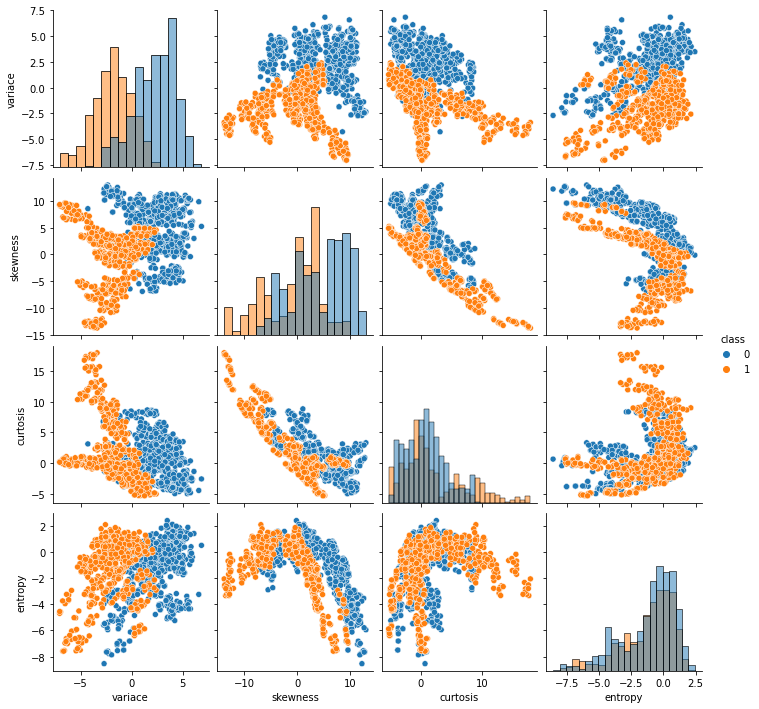

In [ ]:
sns.pairplot(df, hue="class", diag_kind="hist")

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [ ]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.35,
                                                    random_state=42)

In [ ]:
%tensorflow_version 2.x
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [ ]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train)
result = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.6210 - accuracy: 0.6320


In [ ]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 63.2 %')

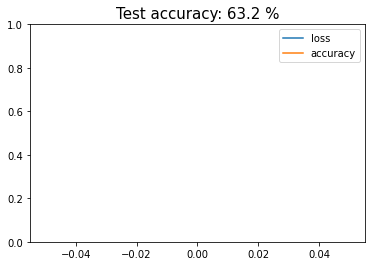

In [ ]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rate

In [ ]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, verbose=0, epochs=10)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
historydf = pd.concat(dflist, axis=1)
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,1.032937,0.216667,0.583458,0.682292,0.461360,0.793750,0.261765,0.896875
1,0.892325,0.320833,0.415491,0.830208,0.276333,0.933333,0.126868,0.969792
2,0.788713,0.442708,0.342309,0.892708,0.217925,0.948958,0.095090,0.975000
3,0.710950,0.569792,0.295342,0.911458,0.183715,0.959375,0.079836,0.978125
4,0.651042,0.633333,0.261113,0.925000,0.160819,0.963542,0.071234,0.976042
5,0.603547,0.675000,0.234737,0.930208,0.144218,0.967708,0.065224,0.980208
6,0.564828,0.711458,0.213752,0.940625,0.131662,0.968750,0.060987,0.980208
7,0.532407,0.730208,0.196708,0.951042,0.121839,0.968750,0.057674,0.981250
8,0.504724,0.751042,0.182588,0.954167,0.113841,0.968750,0.054816,0.981250
9,0.480572,0.766667,0.170736,0.955208,0.107327,0.970833,0.052529,0.980208


In [ ]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

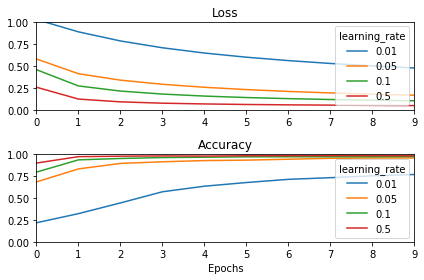

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Optimizers

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [ ]:

historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

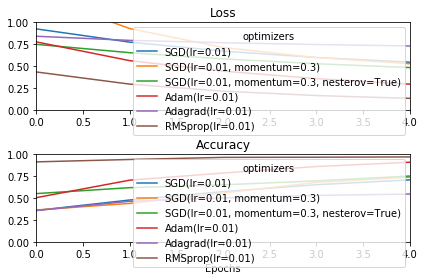

In [ ]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Dropout

In [ ]:
import numpy as np

%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

None 
-1 
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
def repeated_training(X_train,
                      y_train,
                      X_test,
                      y_test,
                      units=512,
                      activation='relu',
                      optimizer='sgd',
                      do_do=False,
                      epochs=10,
                      repeats=3):
    histories = []
    
    for repeat in range(repeats):
        K.clear_session()

        model = Sequential()
        
        # first fully connected layer
        model.add(Conv2D(4, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(Conv2D(4, (2, 2), activation='relu'))
        if do_do:
            model.add(Dropout(0.5))

        # second fully connected layer
        model.add(Flatten())

        model.add(Dense(180, activation='relu'))
        
        if do_do:
            model.add(Dropout(0.25))

        # third fully connected layer
        model.add(Dense(10, activation='softmax'))
        
        model.compile(optimizer,
                      'categorical_crossentropy',
                      metrics=['accuracy'])

        h = model.fit(X_train, y_train,
                      validation_data=(X_test, y_test),
                      epochs=epochs,
                      verbose=0)
        histories.append([h.history['accuracy'], h.history['val_accuracy']])
        print(repeat, end=' ')

    histories = np.array(histories)
    
    # calculate mean and standard deviation across repeats:
    mean_acc = histories.mean(axis=0)
    std_acc = histories.std(axis=0)
    print()
    
    return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [ ]:
mean_acc, std_acc, mean_acc_val, std_acc_val = \
    repeated_training(X_train, y_train, X_test, y_test, do_do=False)

0 1 2 


In [ ]:
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = \
    repeated_training(X_train, y_train, X_test, y_test, do_do=True)

0 1 2 


In [ ]:
def plot_mean_std(m, s):
    plt.plot(m)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)

Text(0, 0.5, 'Accuracy')

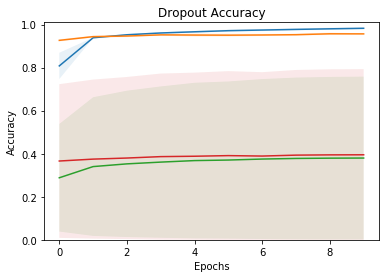

In [ ]:
plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_acc_val, std_acc_val)
plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_acc_val_bn, std_acc_val_bn)
plt.ylim(0, 1.01)
plt.title("Dropout Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')